In [1]:
import pandas as pd
import sqlite3

In [2]:
connect=sqlite3.connect('../data/checking-logs.sqlite', check_same_thread=False)

In [3]:
df=pd.io.sql.read_sql('select * from checker where uid not like "admin_%" ', connect, parse_dates=['timestamp'])
df

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
labels=['night','morning', 'afternoon','evening']
bins=[-1, 4, 10, 17, 24]
df['date']=df['timestamp'].dt.date
df['hour']=df['timestamp'].dt.hour

df['day period']=pd.cut(df['hour'], bins=bins, labels=labels)
df.head()

,index,status,success,timestamp,numTrials,labname,uid,date,hour,day period
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,2020-04-17,5,morning
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,2020-04-17,5,morning
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,2020-04-17,5,morning
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,2020-04-17,5,morning
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,2020-04-17,5,morning


In [5]:
periods=df.groupby('day period').date.value_counts().unstack(0)
periods.head()


/tmp/ipykernel_16165/2463407356.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  periods=df.groupby('day period').date.value_counts().unstack(0)


day period,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16


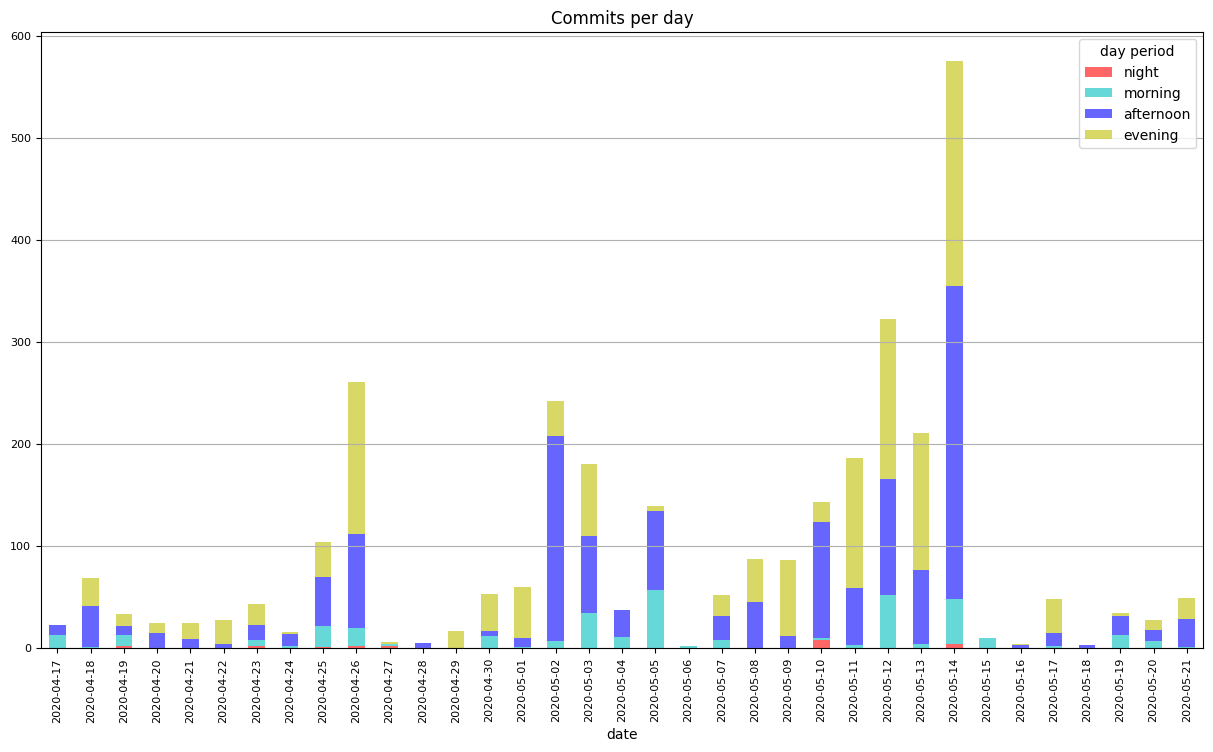

In [6]:
view=periods.plot(kind='bar', color=['r','c', 'b','y'], figsize=(15,8), fontsize=8, title="Commits per day", rot=90, stacked=True, alpha=0.6)
view.grid(axis='y')

### When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [17]:
print(f'in the {periods.sum().nlargest(2).index[0]} and in the {periods.sum().nlargest(2).index[1]} with the numbers {int(periods.sum().nlargest(2).iloc[0])} and {int(periods.sum().nlargest(2).iloc[1])} respectively')

in the afternoon and in the evening with the numbers 1473 and 1369 respectively


### Which day has the most number of commits

In [20]:
print(f'A day with the most number of commits: {periods.sum(axis=1).nlargest(1).index[0]} with the number {periods.sum(axis=1).nlargest(1).iloc[0]}')

A day with the most number of commits: 2020-05-14 with the number 575


In [21]:
ans=periods[periods['evening']>periods['afternoon']].sum(axis=1).nlargest(1)
print(f'A day with the most number of commits: {ans.index[0]} with the number {ans.iloc[0]}')


A day with the most number of commits: 2020-05-12 with the number 323


In [10]:
connect.close()